In [1]:

import numpy as np
import jax.numpy as jnp

from scoobpsf.imshows import *
import scoobpsf.jax_scoob as jscoob
import scoobpsf.jax_dm as jdm

from importlib import reload

Jax platform: gpu
Jax device: NVIDIA A100 80GB PCIe


In [40]:
!nvidia-smi

Tue Sep 19 13:25:23 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.30.02              Driver Version: 530.30.02    CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100 80GB PCIe           On | 00000000:25:00.0 Off |                    0 |
| N/A   32C    P0               63W / 300W|  76623MiB / 81920MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [2]:
from astropy.io import fits
inf_cube = fits.getdata('inf_cube.fits')
inf_sampling = fits.getheader('inf_cube.fits')['SAMPLING']

In [3]:
reload(jdm)
DM = jdm.DeformableMirror(inf_cube=inf_cube, inf_sampling=inf_sampling)

/home/kianmilani/miniconda3/envs/gpu311env/lib/python3.11/site-packages/jax/_src/ops/scatter.py:87: FutureWarning: scatter inputs have incompatible types: cannot safely cast value from dtype=int64 to dtype=bool. In future JAX releases this will result in an error.
  warnings.warn("scatter inputs have incompatible types: cannot safely cast "
2023-09-19 13:10:26.450436: E external/org_tensorflow/tensorflow/compiler/xla/python/pjit.cc:461] fastpath_data is none
2023-09-19 13:10:26.714084: E external/org_tensorflow/tensorflow/compiler/xla/python/pjit.cc:461] fastpath_data is none
2023-09-19 13:10:27.278320: E external/org_tensorflow/tensorflow/compiler/xla/python/pjit.cc:461] fastpath_data is none
2023-09-19 13:10:27.477697: E external/org_tensorflow/tensorflow/compiler/xla/python/pjit.cc:461] fastpath_data is none
2023-09-19 13:10:27.540469: E external/org_tensorflow/tensorflow/compiler/xla/python/pjit.cc:461] fastpath_data is none


hit this


In [33]:
reload(jdm)
DM = jdm.DeformableMirror(inf_cube='inf_cube.fits')

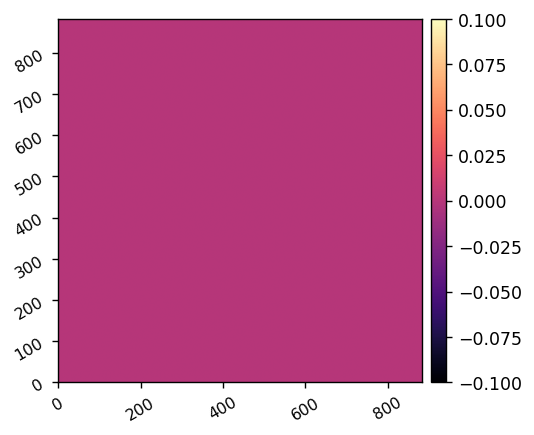

In [4]:
imshow1(np.asarray(DM.get_surface()))

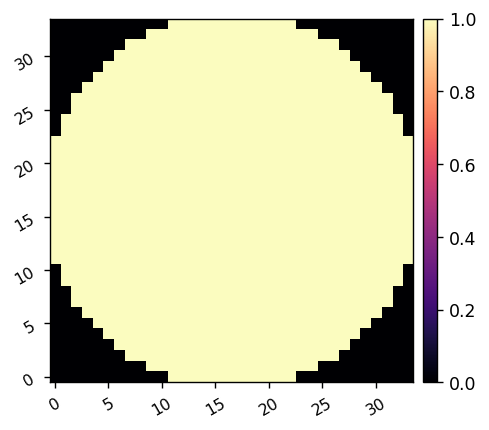

In [4]:
imshow1(np.asarray(DM.dm_mask))

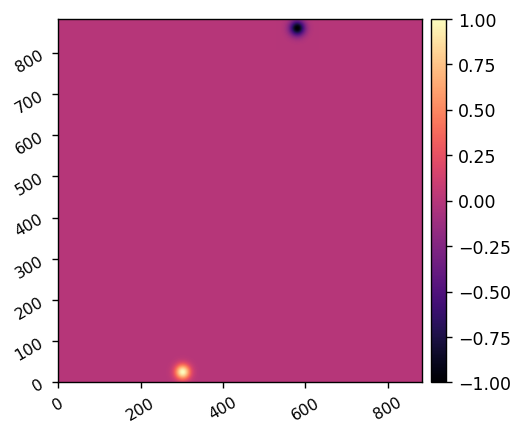

In [5]:
imshow1(np.asarray(DM.inf_cube[0] - DM.inf_cube[-1]))

In [113]:
inf_cube.shape

(952, 958, 958)

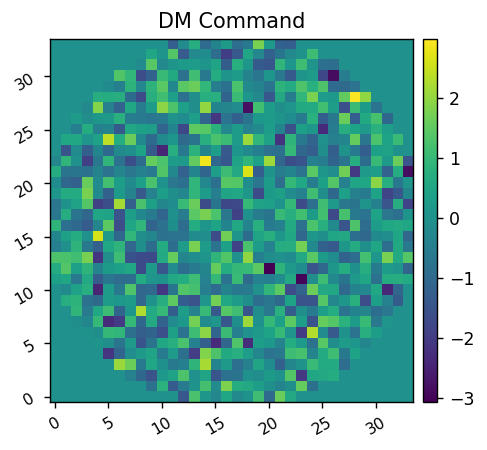

In [37]:
DM.actuators = jnp.array(np.random.randn(DM.Nacts))
imshow1(np.asarray(DM.command), 'DM Command', cmap='viridis')

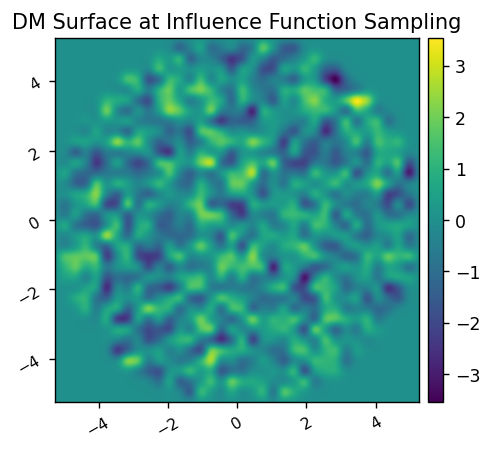

In [38]:
surf = np.asarray(DM.get_surface())
imshow1(surf, 'DM Surface at Influence Function Sampling',
        pxscl=DM.inf_pixelscale.to(u.mm/u.pix), cmap='viridis')

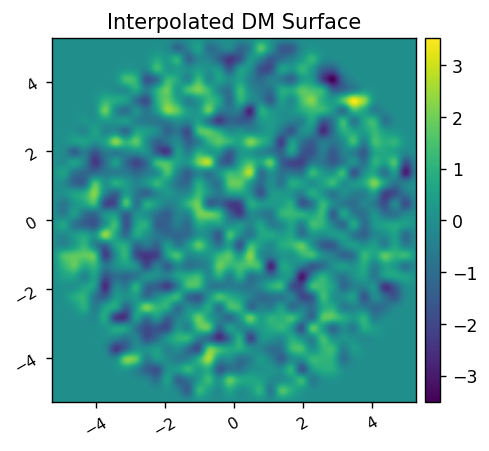

In [39]:
surf_pxscl = 50*u.um/u.pix
interpped_surf = np.asarray(DM.get_surface(pixelscale=surf_pxscl))
imshow1(interpped_surf, 'Interpolated DM Surface',
        pxscl=surf_pxscl.to(u.mm/u.pix), cmap='viridis')